In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [3]:
pd_rMap = pd.read_csv("../output/D_JoinedOneHotYearRateOnehotData.csv")
pd_rMap_NonOH = pd.read_csv("../output/E_JoinedOneHotYearRateNonOnehotData.csv")

In [4]:
df_image_rMap = pd_rMap.copy()
df_image_rMap.describe()

,userId,movieId,rating,titleMap,rYear
count,2.000026e+06,2.000026e+06,2.000026e+06,2.000026e+06,2.000026e+06
mean,6.906057e+04,9.021917e+03,3.524711e+00,1.991473e+03,2.004382e+03
std,4.003111e+04,1.975624e+04,1.051459e+00,1.656925e+01,5.175580e+00
min,1.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,1.995000e+03
25%,3.442500e+04,9.020000e+02,3.000000e+00,1.988000e+03,2.000000e+03
50%,6.918600e+04,2.167000e+03,3.500000e+00,1.995000e+03,2.004000e+03
75%,1.036410e+05,4.757000e+03,4.000000e+00,2.000000e+03,2.008000e+03
max,1.384930e+05,1.312620e+05,5.000000e+00,2.015000e+03,2.015000e+03


In [5]:
df_image_rMap_NoOH = pd_rMap_NonOH.copy()
df_image_rMap_NoOH.describe()

,userId,movieId,rating,titleMap,rYear,rMonth,rDay,rHour
count,2.000026e+06,2.000026e+06,2.000026e+06,2.000026e+06,2.000026e+06,2.000026e+06,2.000026e+06,2.000026e+06
mean,6.906057e+04,9.021917e+03,3.524711e+00,1.991473e+03,2.004382e+03,6.609976e+00,1.564904e+01,1.244560e+01
std,4.003111e+04,1.975624e+04,1.051459e+00,1.656925e+01,5.175580e+00,3.551959e+00,8.797929e+00,7.351344e+00
min,1.000000e+00,1.000000e+00,5.000000e-01,0.000000e+00,1.995000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.442500e+04,9.020000e+02,3.000000e+00,1.988000e+03,2.000000e+03,3.000000e+00,8.000000e+00,5.000000e+00
50%,6.918600e+04,2.167000e+03,3.500000e+00,1.995000e+03,2.004000e+03,7.000000e+00,1.600000e+01,1.400000e+01
75%,1.036410e+05,4.757000e+03,4.000000e+00,2.000000e+03,2.008000e+03,1.000000e+01,2.300000e+01,1.900000e+01
max,1.384930e+05,1.312620e+05,5.000000e+00,2.015000e+03,2.015000e+03,1.200000e+01,3.100000e+01,2.300000e+01


## 可视化数据

In [6]:
rMap_columns = df_image_rMap.columns
Months = []
Days = []
Hours = []
for e in rMap_columns:
    SearchObject = re.search(r'rMonth_[0-2][0-9]', e)
    if SearchObject:
        Months.append(e)
    SearchObject = re.search(r'rHour_[0-2][0-9]', e)
    if SearchObject:
        Days.append(e)
    SearchObject = re.search(r'rDay_[0-3][0-9]', e)
    if SearchObject:
        Hours.append(e)

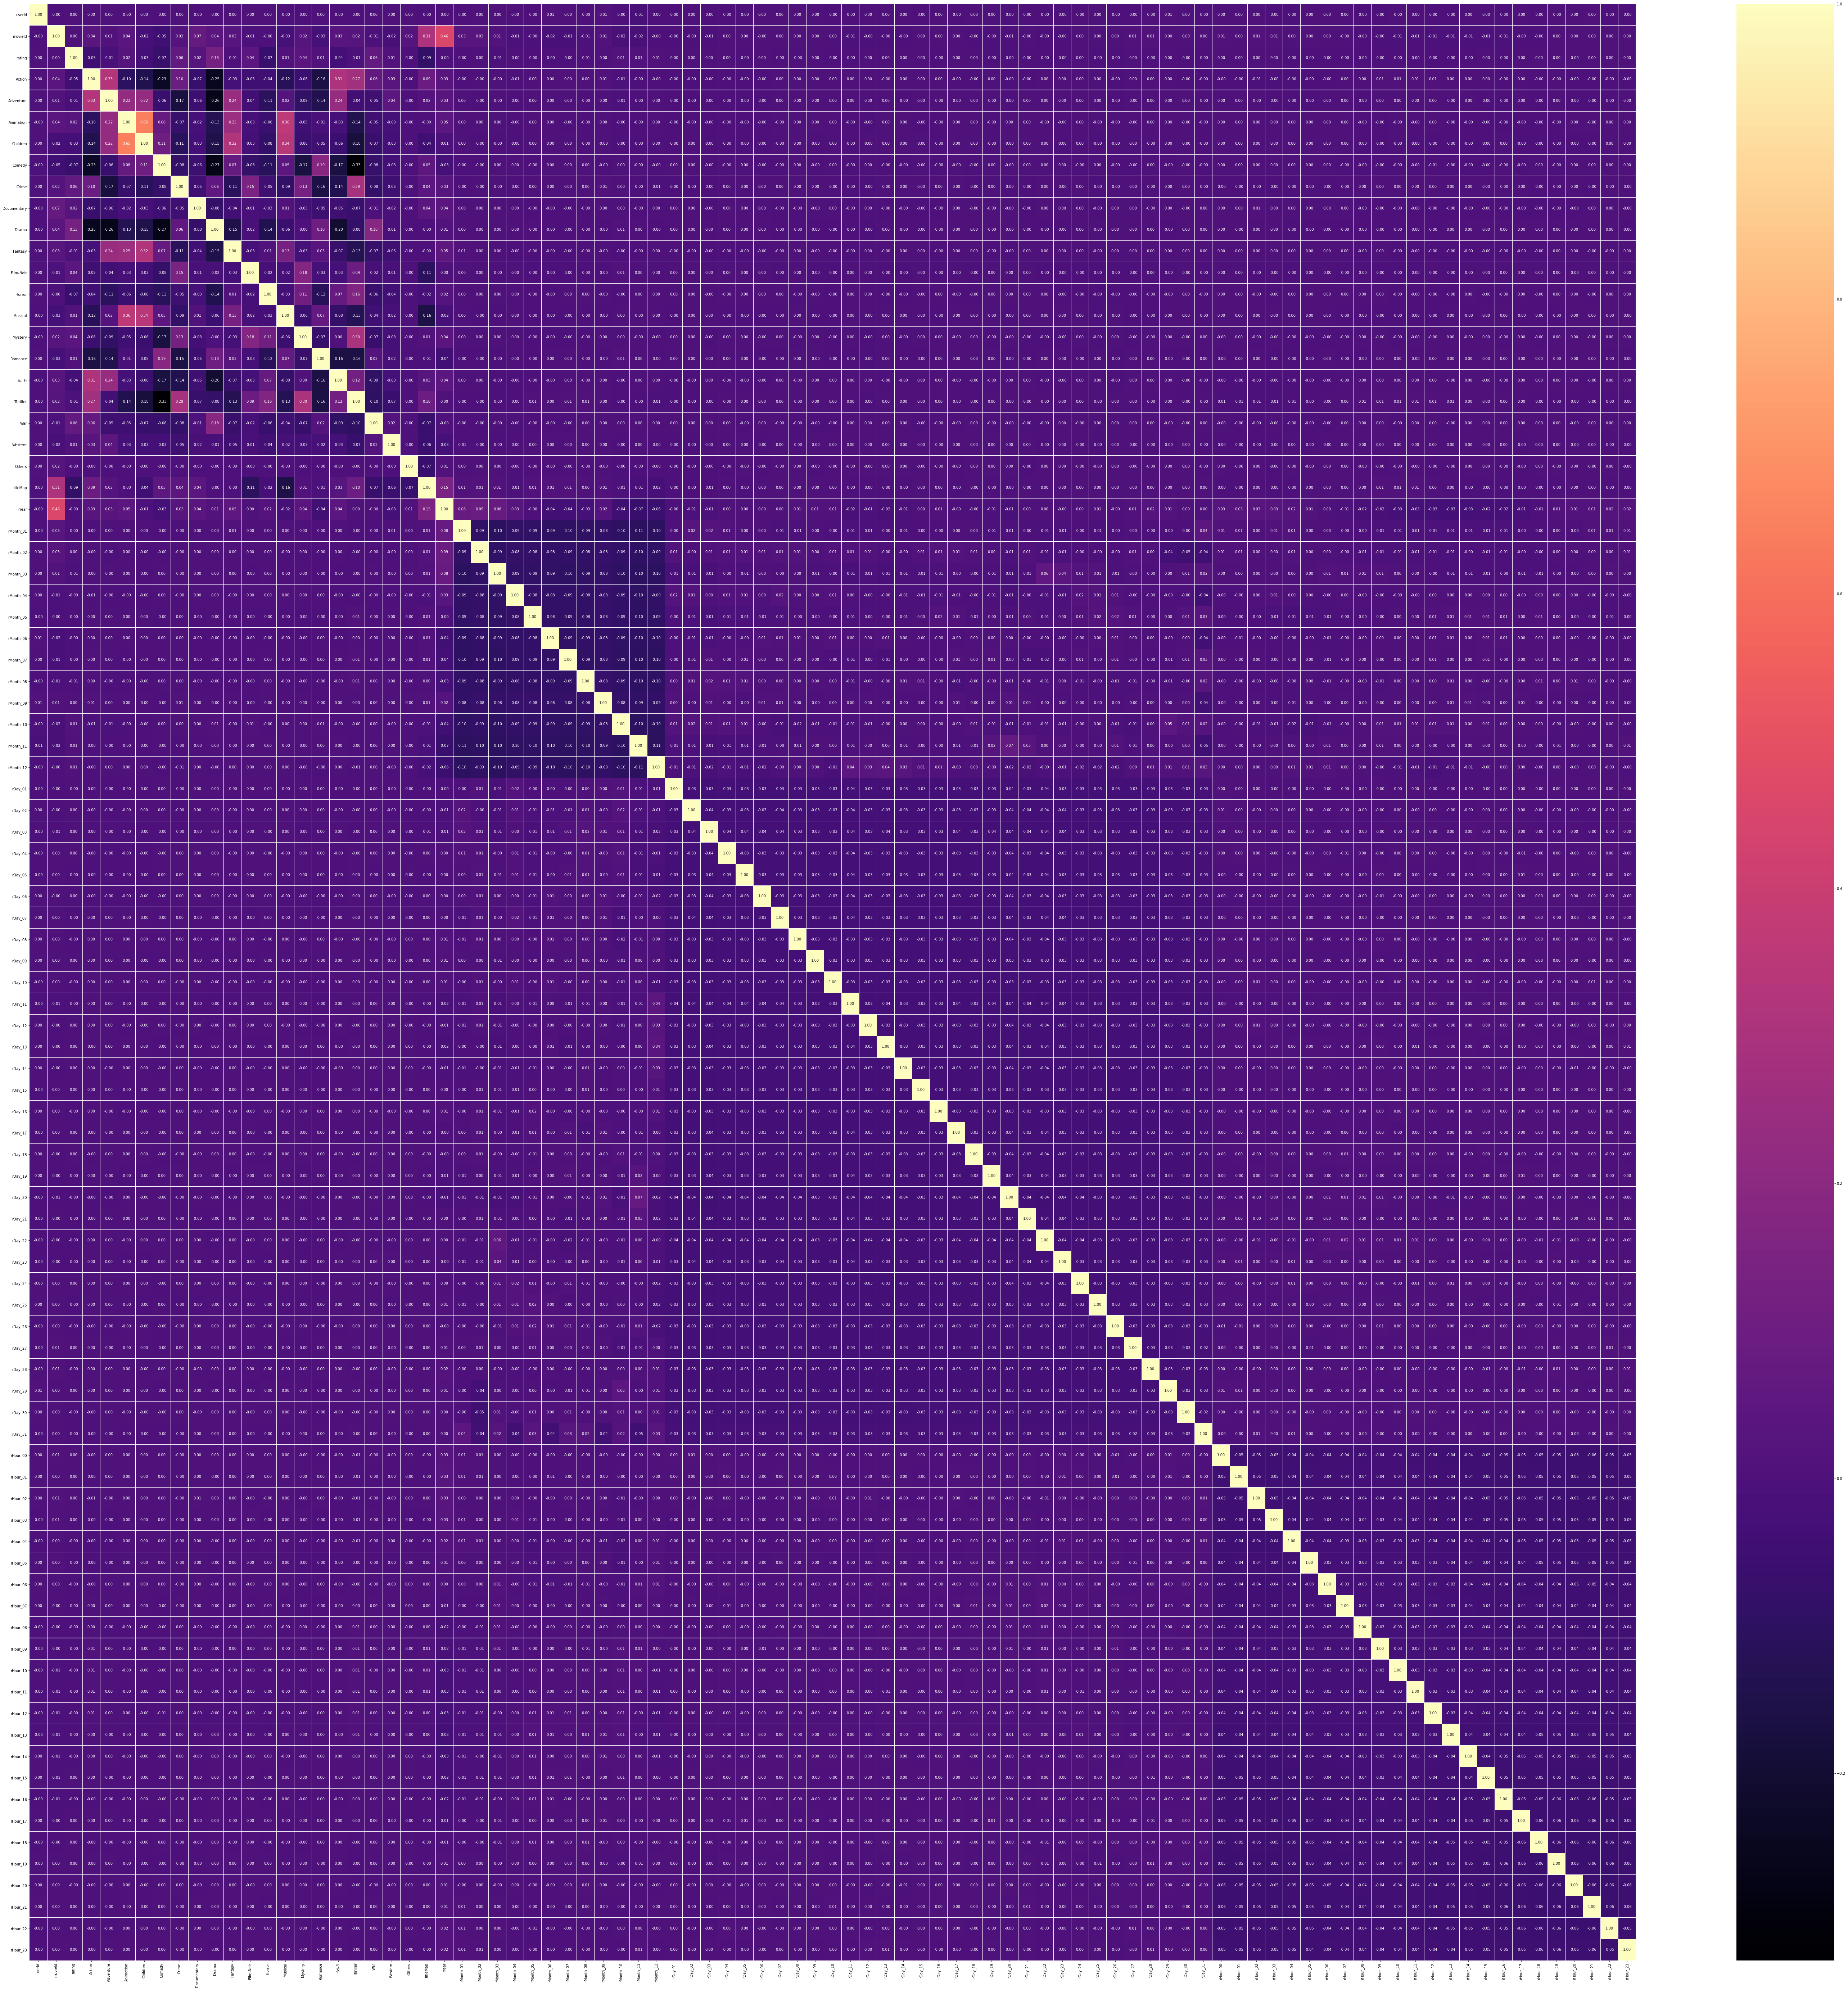

In [7]:
%matplotlib inline
fig, axes = plt.subplots(figsize = (100, 100))
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.heatmap(df_image_rMap.corr(method = 'pearson'), ax = axes, annot = True, fmt = '.2f', linewidths = 0.03, cmap="magma")
plt.savefig("../output/imgs/OneHotPearsonCorr.png")

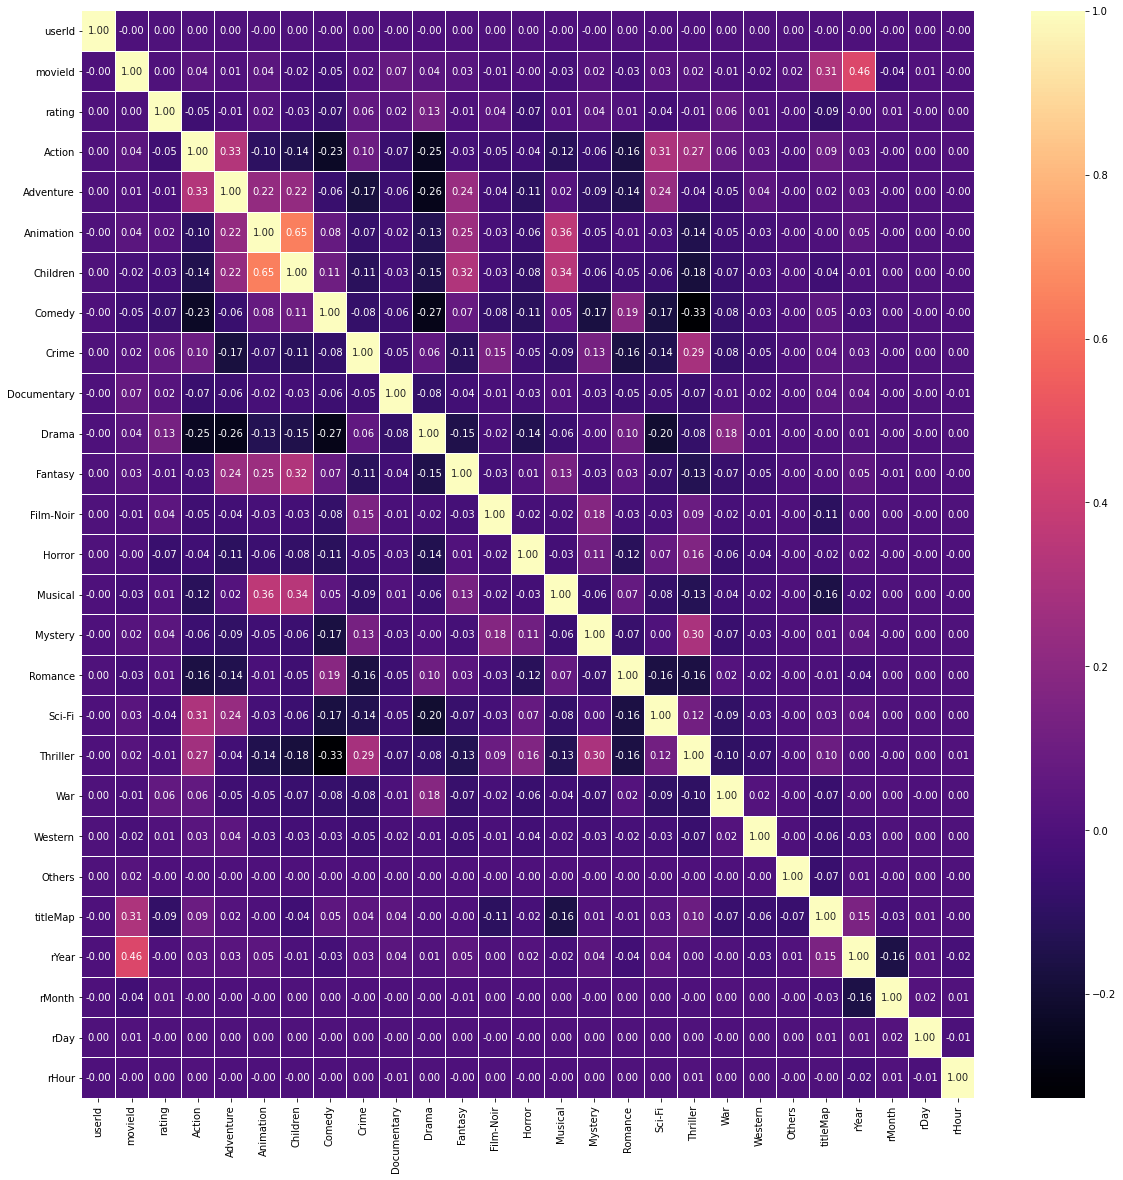

In [8]:
fig, axes = plt.subplots(figsize = (20, 20))
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.heatmap(df_image_rMap_NoOH.corr(method = 'pearson'), ax = axes, annot = True, fmt = '.2f', linewidths = 0.03, cmap="magma")
plt.savefig("../output/imgs/NonOneHotPearsonCorr.png")

### 每月观影数饼状图和柱状图

In [9]:
df_image_rMap_NoOH = df_image_rMap_NoOH.sort_values(by = "rMonth")
df_month = pd.DataFrame(df_image_rMap_NoOH['rMonth'].value_counts()).sort_index()

D:\Users\拾夕\Anaconda3\envs\ForJupyter\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


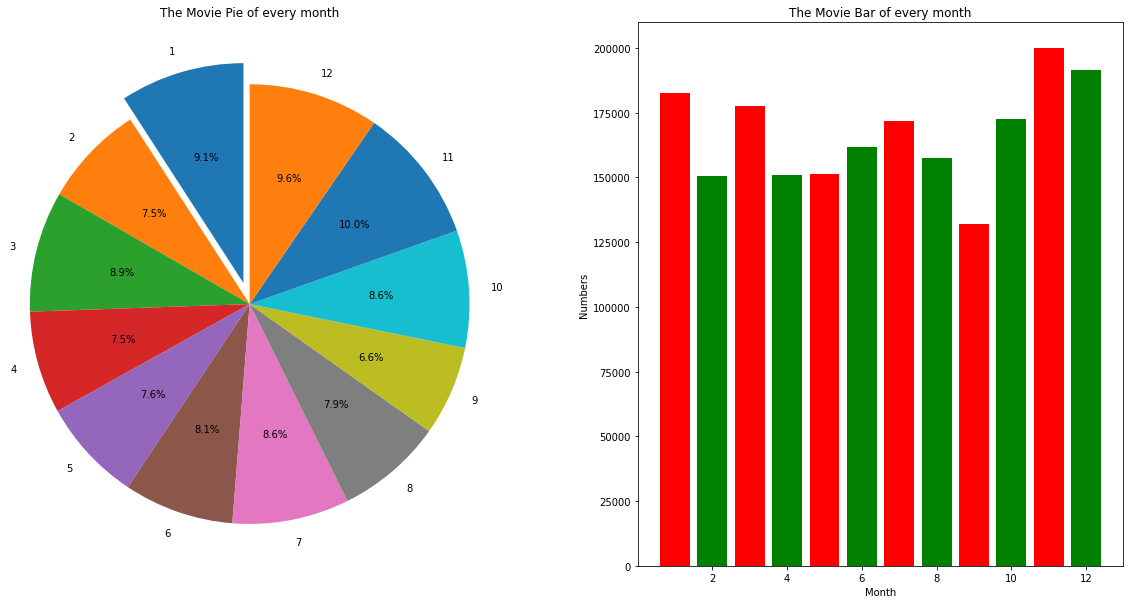

In [10]:
fig1, ax1 = plt.subplots(1, 2)
fig1.set_size_inches(20, 10)
ax1 = ax1.flatten()
ax1[0].pie(df_month['rMonth'],explode = (0.1, 0, 0, 0,0,0,0,0,0,0,0,0), labels=df_month.index, autopct='%1.1f%%', startangle=90)
ax1[0].axis('equal')
ax1[0].set_title("The Movie Pie of every month")
ax1[1].bar(range(1,len(df_month)+1), df_month['rMonth'], width = 0.8, color='rg')
ax1[1].set_title("The Movie Bar of every month")
ax1[1].set_ylabel("Numbers")
ax1[1].set_xlabel("Month")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.savefig("../output/imgs/PieBar_12Months.png")
plt.show()

### 每日观影数饼状图和柱状图

In [11]:
df_image_rMap_NoOH = df_image_rMap_NoOH.sort_values(by = "rDay")
df_day = pd.DataFrame(df_image_rMap_NoOH['rDay'].value_counts()).sort_index()

D:\Users\拾夕\Anaconda3\envs\ForJupyter\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


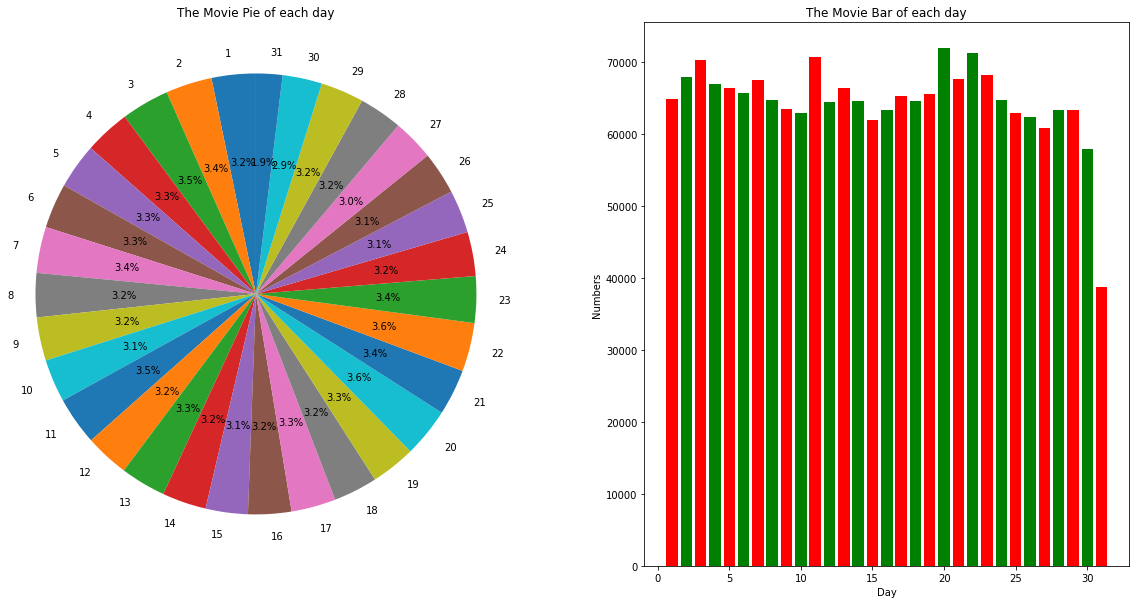

In [12]:
fig1, ax1 = plt.subplots(1, 2)
fig1.set_size_inches(20, 10)
ax1 = ax1.flatten()
ax1[0].pie(df_day['rDay'], labels=df_day.index, autopct='%1.1f%%', startangle=90)
ax1[0].axis('equal')
ax1[0].set_title("The Movie Pie of each day")
ax1[1].bar(range(1, len(df_day)+1), df_day['rDay'], width = 0.8, color='rg')
ax1[1].set_title("The Movie Bar of each day")
ax1[1].set_ylabel("Numbers")
ax1[1].set_xlabel("Day")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.savefig("../output/imgs/PieBar_Days.png")
plt.show()

### 每小时观影数饼状图和柱状图

In [13]:
df_image_rMap_NoOH = df_image_rMap_NoOH.sort_values(by = "rHour")
df_hour = pd.DataFrame(df_image_rMap_NoOH['rHour'].value_counts()).sort_index()

D:\Users\拾夕\Anaconda3\envs\ForJupyter\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


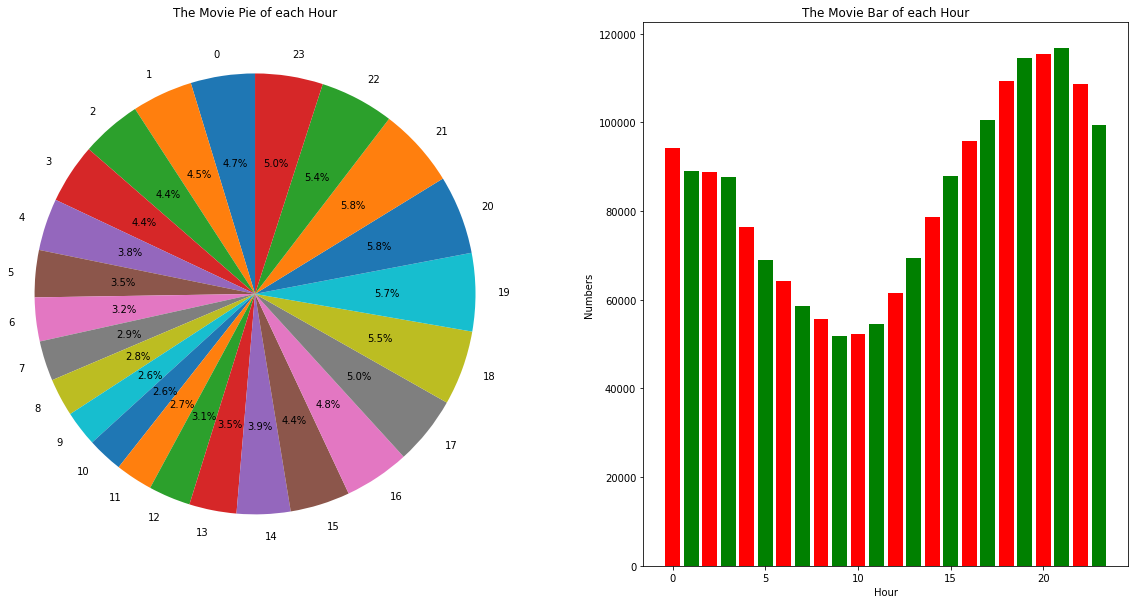

In [14]:
fig1, ax1 = plt.subplots(1, 2)
fig1.set_size_inches(20, 10)
ax1 = ax1.flatten()
ax1[0].pie(df_hour['rHour'], labels=df_hour.index, autopct='%1.1f%%', startangle=90)
ax1[0].axis('equal')
ax1[0].set_title("The Movie Pie of each Hour")
ax1[1].bar(range(len(df_hour)), df_hour['rHour'], width = 0.8, color='rg')
ax1[1].set_title("The Movie Bar of each Hour")
ax1[1].set_ylabel("Numbers")
ax1[1].set_xlabel("Hour")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.savefig("../output/imgs/PieBar_Hours.png")
plt.show()

### 每种类型电影的观影人数

In [15]:
Num_Genres = []
genres = ["Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western", "Others"]
for e in genres:
    m = df_image_rMap.value_counts(e).sort_index()
    Num_Genres.append(m[1])
print(Num_Genres)

[562501, 438157, 114294, 166886, 750364, 330021, 24547, 884628, 211111, 21712, 148593, 87130, 156113, 379251, 315212, 531983, 104870, 42186, 43]


D:\Users\拾夕\Anaconda3\envs\ForJupyter\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  import sys


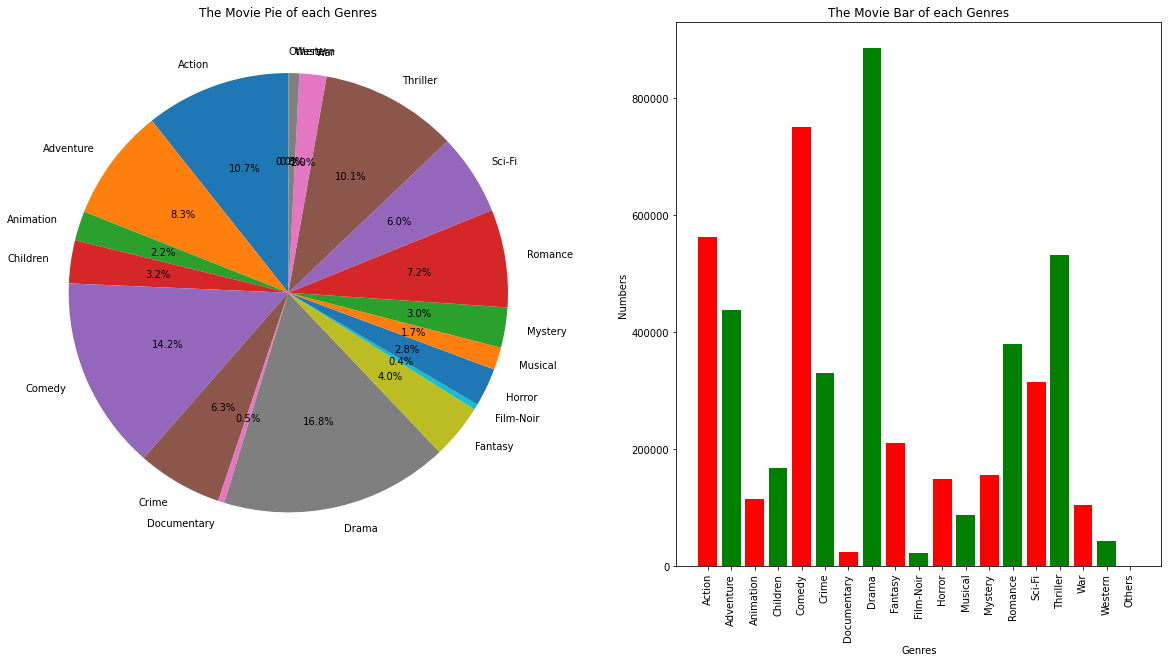

In [16]:
fig1, ax1 = plt.subplots(1, 2)
fig1.set_size_inches(20, 10)
ax1 = ax1.flatten()
ax1[0].pie(Num_Genres, labels=genres, autopct='%1.1f%%', startangle=90)
ax1[0].axis('equal')
ax1[0].set_title("The Movie Pie of each Genres")
ax1[1].bar(genres, Num_Genres, width = 0.8, color='rg')
ax1[1].set_title("The Movie Bar of each Genres")
ax1[1].set_ylabel("Numbers")
ax1[1].set_xlabel("Genres")
plt.xticks(rotation=90)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.savefig("../output/imgs/PieBar_Genres.png")
plt.show()

### 每种类型电影的评分 饼状图

In [27]:
df_image_rMap.sort_values(by = 'rating', inplace= True)

In [33]:
df_image_rMap.head()

,userId,movieId,rating,ratingTime,title,genres,Action,Adventure,Animation,Children,...,rHour_14,rHour_15,rHour_16,rHour_17,rHour_18,rHour_19,rHour_20,rHour_21,rHour_22,rHour_23
1380783,43547,888,0.5,2005-04-01 14:23:39,Land Before Time III: The Time of the Great Gi...,Adventure|Animation|Children|Musical,False,True,True,True,...,True,False,False,False,False,False,False,False,False,False
500369,113954,4334,0.5,2012-07-02 03:23:13,Yi Yi (2000),Drama,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200552,89795,3535,0.5,2004-12-01 06:42:51,American Psycho (2000),Crime|Horror|Mystery|Thriller,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1618386,64715,89745,0.5,2015-01-23 17:52:24,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,True,True,False,False,...,False,False,False,True,False,False,False,False,False,False
218079,13564,8666,0.5,2011-05-05 18:52:44,Catwoman (2004),Action|Crime|Fantasy,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


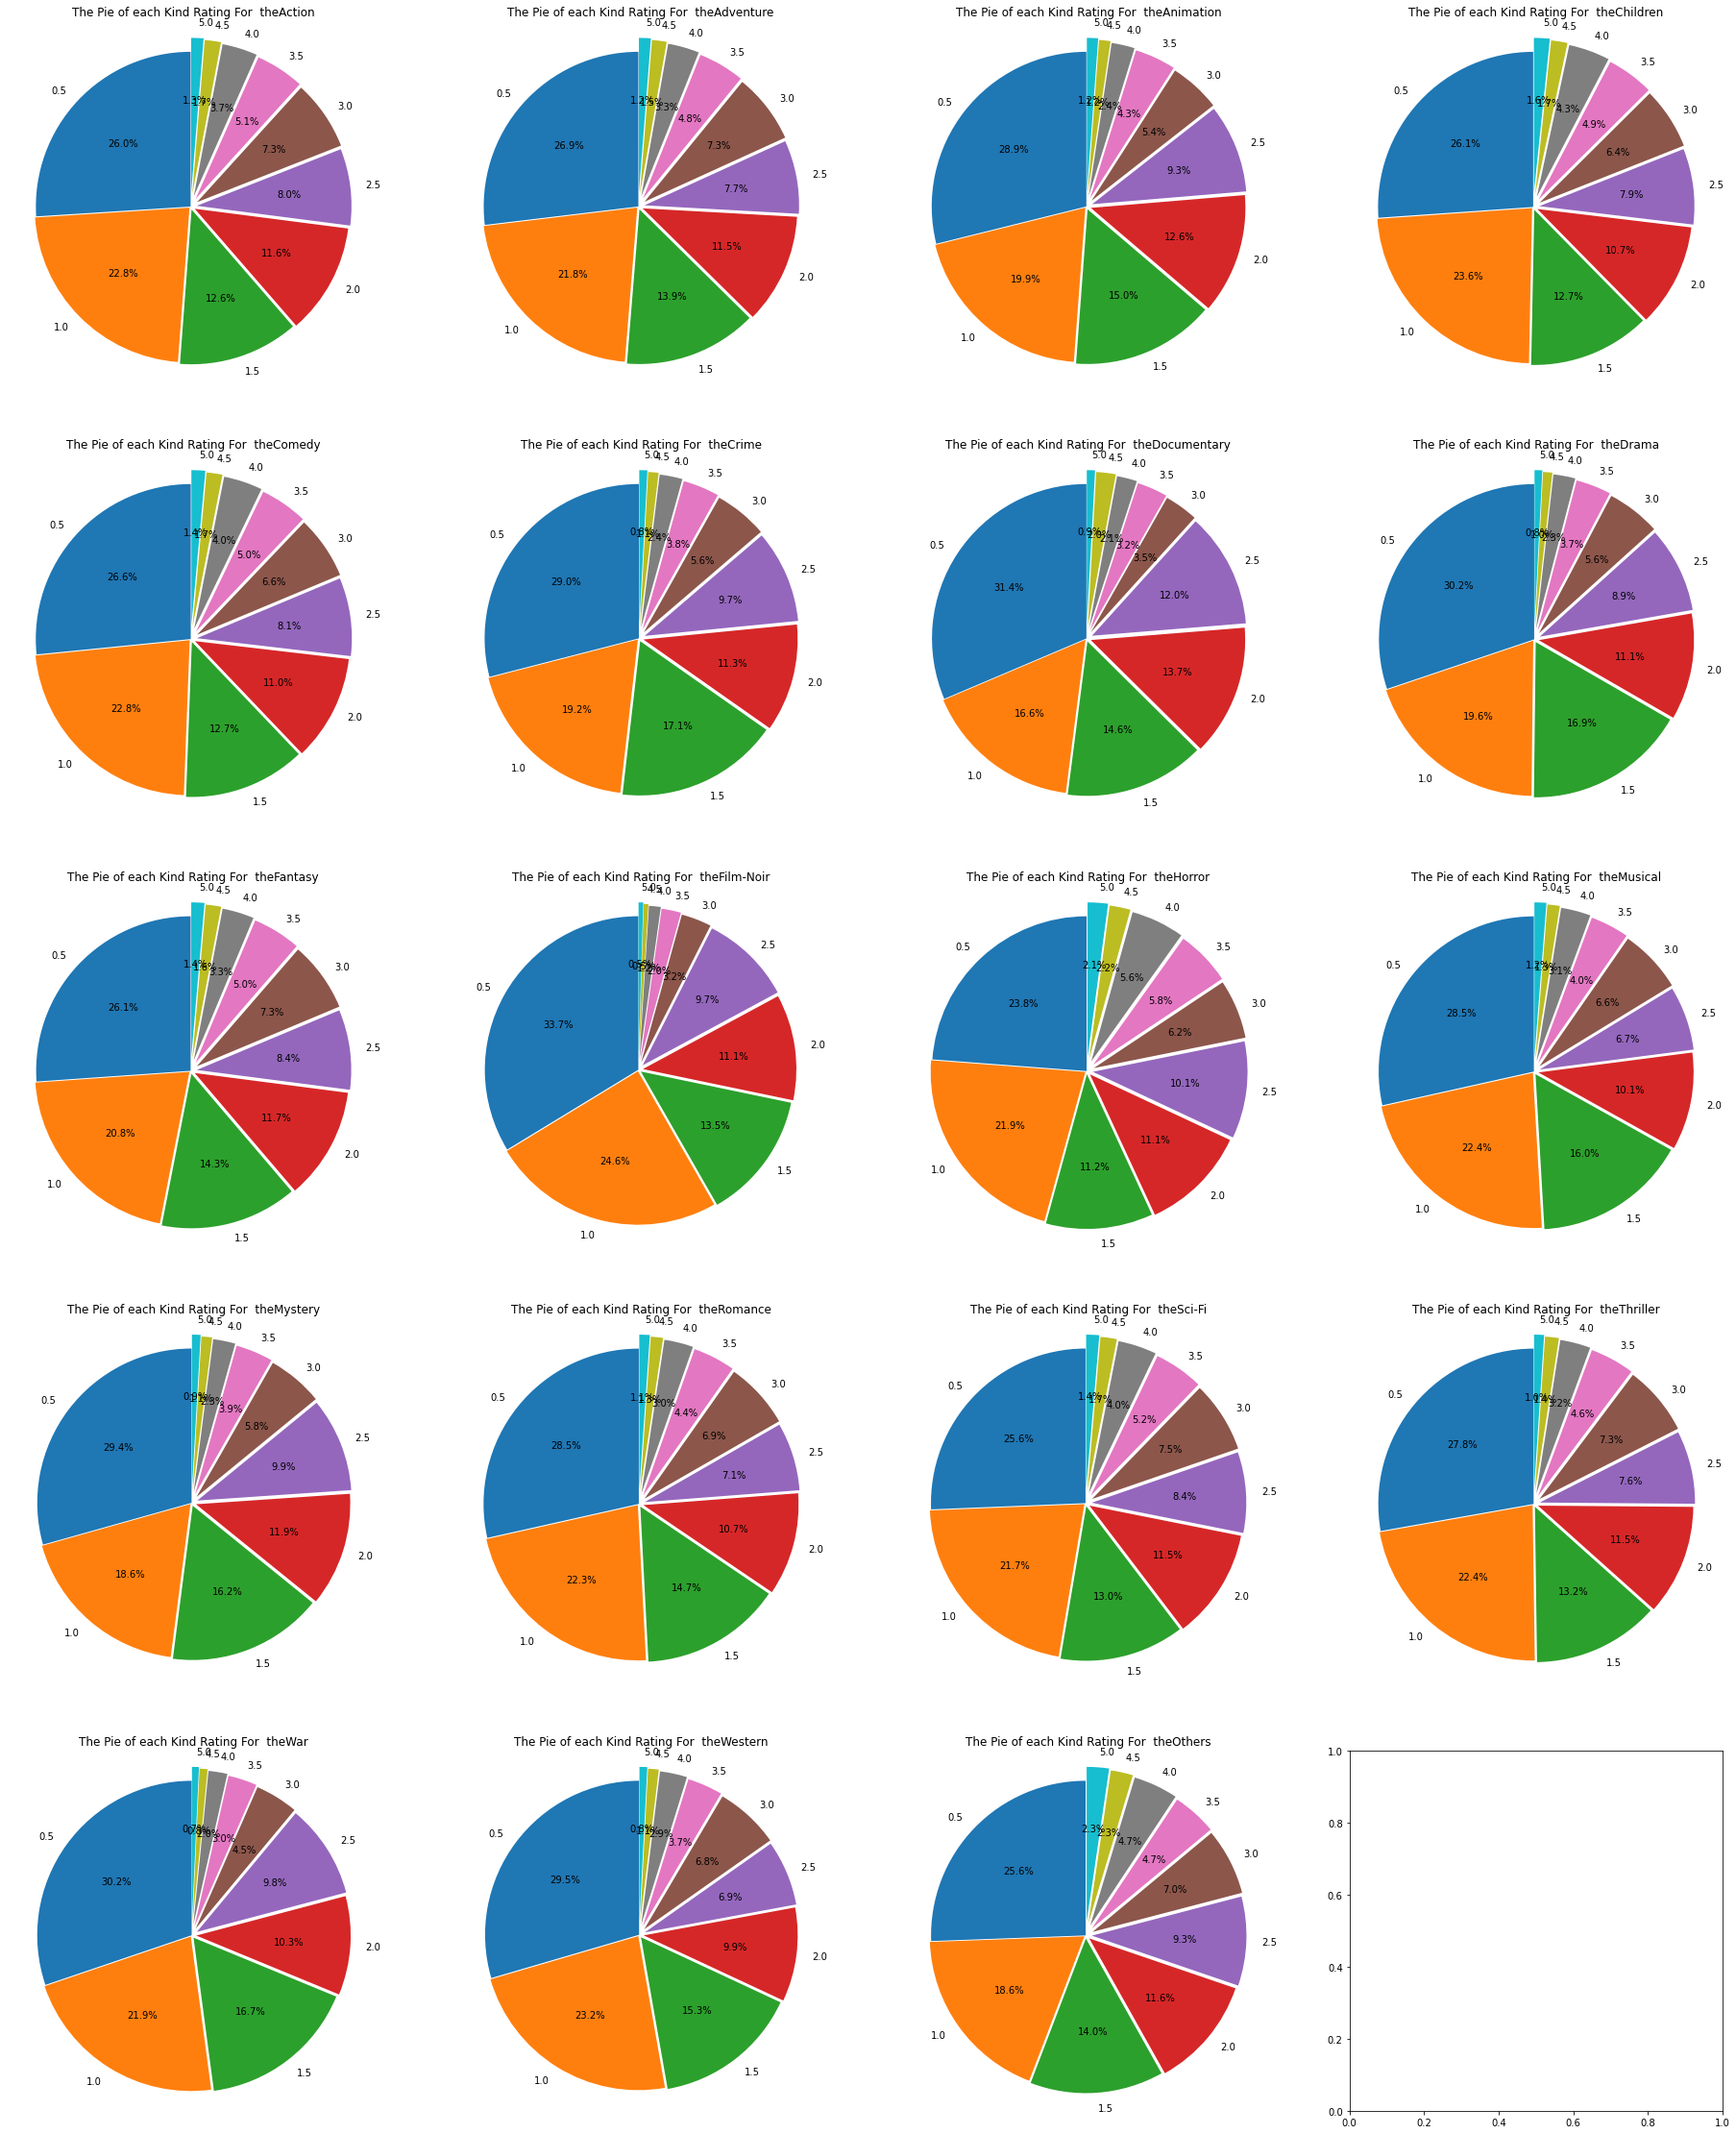

In [54]:
fig1, ax1 = plt.subplots(5, 4)
fig1.set_size_inches(32, 40)
ax1 = ax1.flatten()
label = np.arange(0.5, 5.5, 0.5)
explode = np.ones(shape=(len(label)))
for i in range(len(explode)):
    explode[i] = i*0.01
explode
a = []
for i, e in enumerate(genres):
    a = df_image_rMap[df_image_rMap[e] == True].value_counts('rating').tolist()
    ax1[i].pie(a, labels=label, autopct='%1.1f%%', startangle=90,explode=explode)
    ax1[i].axis('equal')
    ax1[i].set_title("The Pie of each Kind Rating For  the"+genres[i])
# plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
plt.savefig("../output/imgs/PieRating_Genres.png")
plt.show()

In [26]:
a = []
for e in genres:
    rating
    a = df_image_rMap[df_image_rMap[e] == True].value_counts('rating').tolist()

[146314, 128208, 70741, 65141, 44989, 41058, 28654, 20641, 9529, 7226]

## 聚类

### Kmeans

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [17]:
df_image_rMap.shape

(2000026, 93)

In [19]:
df_pre_kmeans = df_image_rMap.drop(["title","ratingTime"], axis = 1)
df_pre_kmeans = df_pre_kmeans.sample(frac=0.3)
df_pre_kmeans.shape

(600008, 91)

The max score is 0.49934187490105425, the cluster number is 4


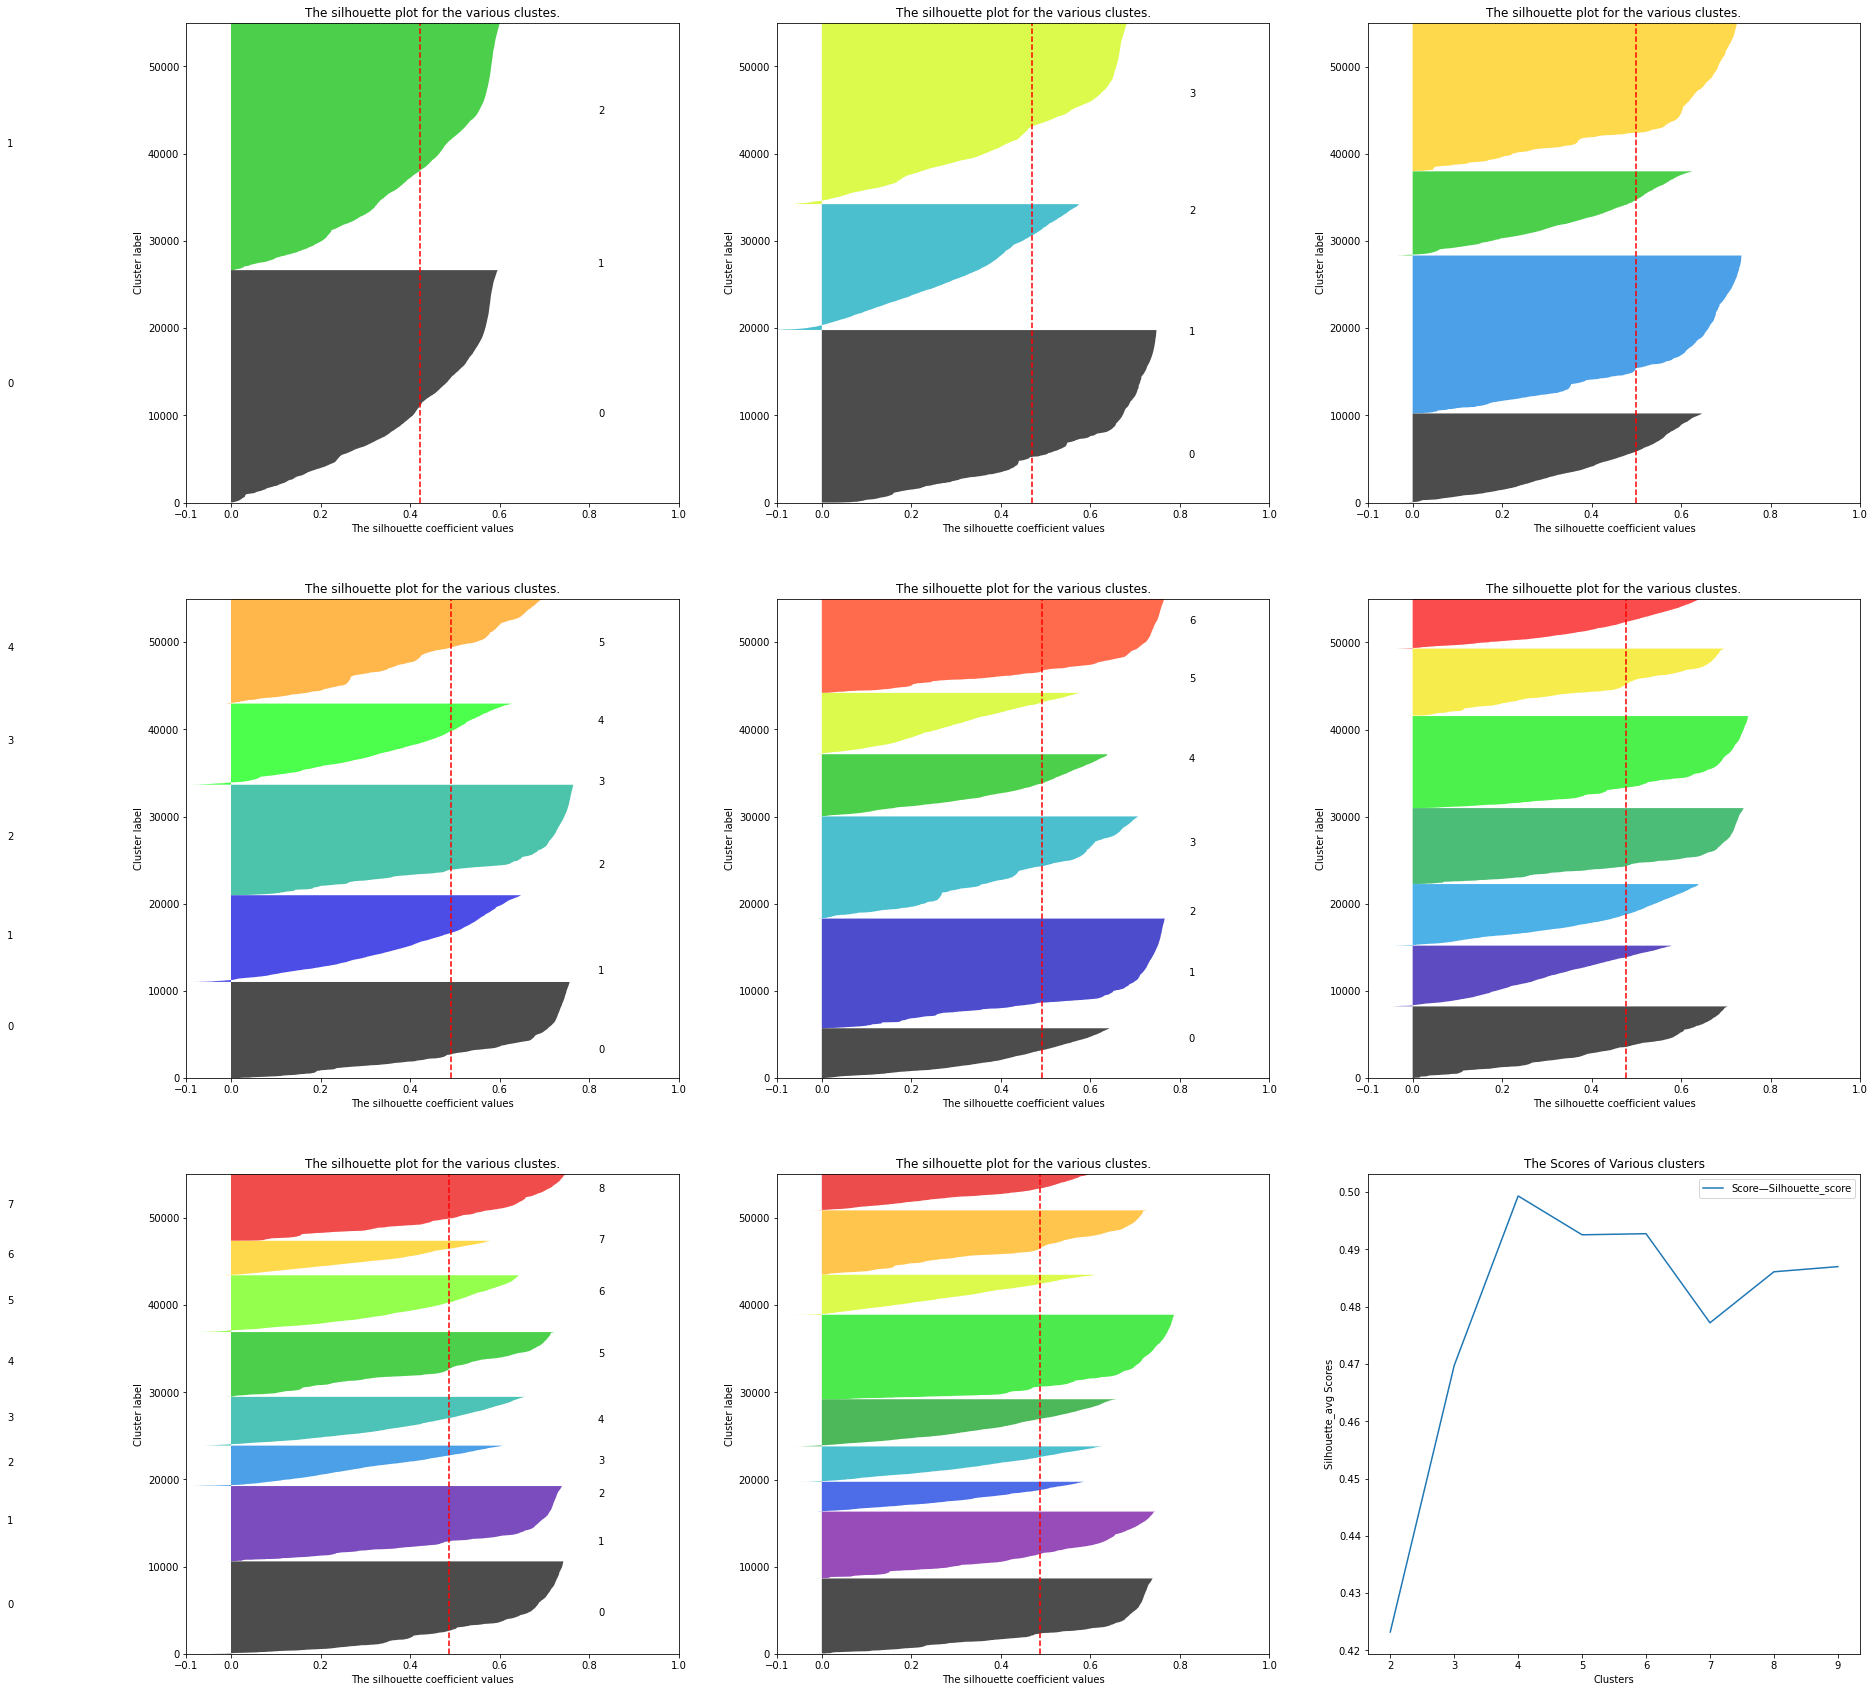

In [ ]:
# m = df_pre_kmeans.loc[:1000, :]
m = df_pre_kmeans
Nm_pre_kmeans  = m.values
fig,ax1 = plt.subplots(3, 3)
ax1 = ax1.flatten()
fig.set_size_inches(30, 30)
score = []
clusterNum = [2, 3, 4, 5, 6, 7, 8, 9]
for n_clusters in clusterNum:

    clusterer = KMeans(n_clusters = n_clusters, random_state = 10).fit(Nm_pre_kmeans)
    cluster_labels = clusterer.labels_

    silhouette_avg = silhouette_score(Nm_pre_kmeans, cluster_labels)
    score.append(silhouette_avg)
#     print("For n_clusters = ", n_clusters," The average silhouette_score is : ",silhouette_avg)

    sample_silhouette_values = silhouette_samples(Nm_pre_kmeans, cluster_labels)

    ax1[n_clusters-2].set_xlim([-0.1, 1])
    ax1[n_clusters-2].set_ylim([0, Nm_pre_kmeans.shape[0] + (n_clusters +1)*10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i)/n_clusters)

        ax1[n_clusters-2].fill_betweenx(np.arange(y_lower, y_upper),
                         ith_cluster_silhouette_values,
                         facecolor = color,
                         alpha = 0.7)

        ax1[n_clusters-2].text(-0.5, y_lower + 0.5*size_cluster_i, str(i))

        y_lower = y_upper + 10
    ax1[n_clusters-2].set_title("The silhouette plot for the various clustes.")
    ax1[n_clusters-2].set_xlabel("The silhouette coefficient values")
    ax1[n_clusters-2].set_ylabel("Cluster label")

    # Add a dot line, the countor factor mean of the whole dataset, to the fig1
    ax1[n_clusters-2].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1[n_clusters-2].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
print(f"The max score is {max(score)}, the cluster number is {[*clusterNum][score.index(max(score))]}")
ax1[-1].set_title(f"The Scores of Various clusters")
ax1[-1].set_xlabel("Clusters")
ax1[-1].set_ylabel("Silhouette_avg Scores")
# ax1[-1].xticks(range(minDeep, maxDeep))
ax1[-1].plot(clusterNum, score, label='Score—Silhouette_score')
ax1[-1].legend()
plt.savefig("../output/imgs/Kmeans_ScoreOverAll.png")
plt.show()